In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
#%matplotlib notebook

In [3]:
#reading routine
def read_table(folder, file) :
    file = folder + file
    file_list = []
    print(file)
    for line in open(file) :
        temp_array_line = []
        try :
            if line[0] == '#' :          #skip commented lines
                continue
            else :
                temp_array_line=list(map(float, line.split( )))
                file_list.append(temp_array_line)
        except :
            print('error')
    k = np.array(file_list[0])
    nb_of_modes = np.array(file_list[1])
    table = np.array(file_list[2:])
    t = table[:,0]
    corr = table[:,1:]
    return [k, nb_of_modes,t,corr]

In [4]:
folder = "/home/gorbunov8a/CODE/random_advection_test/time_corr/exponent/"
ite = 2
[k, nb_of_modes, t_vel, vel_corr] = read_table(folder, "two_point_corr_complex_lin_Cavg_wi=%03d" % ite + ".table")
[k, nb_of_modes, t_scal, scal_corr] = read_table(folder, "scalar1_two_point_corr_complex_lin_Cavg_wi=%03d" % ite + ".table")

/home/gorbunov8a/CODE/random_advection_test/time_corr/exponent/two_point_corr_complex_lin_Cavg_wi=002.table
/home/gorbunov8a/CODE/random_advection_test/time_corr/exponent/scalar1_two_point_corr_complex_lin_Cavg_wi=002.table


In [5]:
# folder = "/home/gorbunov8a/CODE/random_advection_test/time_corr/exponent/"
# ite = 15
# [k, nb_of_modes, t_vel, vel_corr] = read_table(folder, "two_point_corr_complex_lin_Cavg_wi=%03d" % ite + ".table")
# [k, nb_of_modes, t_scal, scal_corr] = read_table(folder, "scalar1_two_point_corr_complex_lin_Cavg_wi=%03d" % ite + ".table")

In [6]:
# folder = "/home/gorbunov8a/CODE/random_advection_test/time_corr/delta/"
# ite = 4
# [k, nb_of_modes, t_vel, vel_corr] = read_table(folder, "two_point_corr_complex_lin_Cavg_wi=%03d" % ite + ".table")
# [k, nb_of_modes, t_scal, scal_corr] = read_table(folder, "scalar1_two_point_corr_complex_lin_Cavg_wi=%03d" % ite + ".table")

In [7]:
# folder = "/home/gorbunov8a/data/random_advection/ns/rl90_N256/run1/"
# ite = 50
# [k, nb_of_modes, t_vel, vel_corr] = read_table(folder, "two_point_corr_complex_lin_Cavg_wi=%03d" % ite + ".table")
# [k, nb_of_modes, t_scal, scal_corr] = read_table(folder, "scalar1_two_point_corr_complex_lin_Cavg_wi=%03d" % ite + ".table")

In [8]:
plt.rc('axes', labelsize=16)  
plt.rc('axes', titlesize=16)  
plt.rc('legend', fontsize=10)  

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
default_cycler = cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors))
plt.rc('axes', prop_cycle=default_cycler)

In [9]:
nb_of_curves = 7
kmin = 10
kmax = 30
indices_of_k_to_plot = np.int_(np.linspace(kmin, kmax, nb_of_curves))
print(indices_of_k_to_plot)

[10 13 16 20 23 26 30]


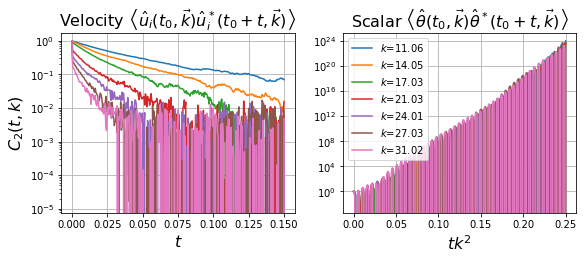

In [10]:
fig, ax = plt.subplots(constrained_layout=True, nrows=1, ncols=2, figsize=(8,3.5))
for ik in indices_of_k_to_plot :
    ax[0].plot(t_vel[0::]*k[ik]**(0), vel_corr[0:,ik]/vel_corr[0,ik],label=r'$k$=%2.2f' % k[ik])
    ax[1].plot(t_scal[::]*k[ik]**(0), scal_corr[:,ik]/scal_corr[0,ik], '-',label=r'$k$=%2.2f' % k[ik])
ax[0].set(title=r'Velocity $\left<\hat{u}_i(t_0,\vec{k}) \hat{u}^*_i(t_0+t,\vec{k})\right>$',xlabel=r'$t$', xscale='linear', yscale='log', ylabel=r'$C_2(t, k)$'); ax[0].grid()
#ax[0].set(xlim=[0,3.0], ylim=[10e-5, 1.5])
ax[1].set(title=r'Scalar $\left<\hat{\theta}(t_0,\vec{k}) \hat{\theta}^*(t_0+t,\vec{k})\right>$', xlabel=r'$t k^2$', xscale='linear', yscale='log'); ax[1].grid()
#ax[1].set(xlim=[0,50.0], ylim=[10e-6, 1.5])
ax[1].legend(loc='best')
# pp = PdfPages('Images/Scalar/delta_tk.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()
plt.show()

/home/gorbunov8a/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/home/gorbunov8a/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


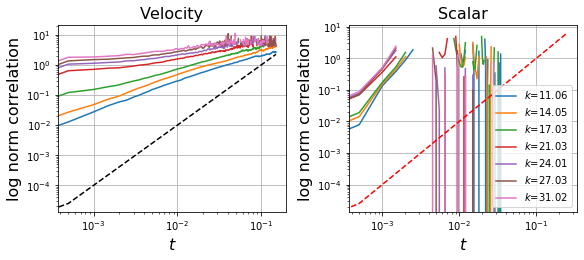

In [11]:
fig, ax = plt.subplots(constrained_layout=True, nrows=1, ncols=2, figsize=(8,3.5))
for ik in indices_of_k_to_plot :
    ax[0].plot(t_vel[::], -np.log(vel_corr[:,ik]/vel_corr[0,ik]),label=r'$k$=%2.2f' % k[ik])
    ax[1].plot(t_scal[::], -np.log(scal_corr[:,ik]/scal_corr[0,ik]), '-',label=r'$k$=%2.2f' % k[ik])
ax[0].plot(t_vel[::], 10e1*t_vel**2, 'k--')
ax[1].plot(t_scal[::], 10e1*t_scal**(2), 'r--')
#ax[1].plot(t_scal[::], 10e1*t_scal**(5/3), 'k--')
ax[0].set(title='Velocity',xlabel=r'$t$', xscale='log', yscale='log', ylabel='log norm correlation'); ax[0].grid()
#ax[0].set(xlim=[0,3], ylim=[10e-5, 1.1])
ax[1].set(title='Scalar', xlabel=r'$t$', xscale='log', yscale='log', ylabel='log norm correlation'); ax[1].grid()
#ax[1].set(xlim=[0,3], ylim=[10e-6, 1.5])
ax[1].legend(loc='lower right')
plt.show()

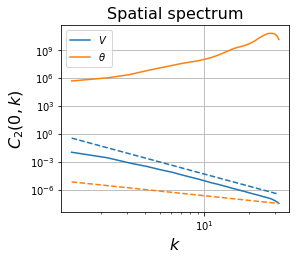

In [12]:
fig, ax = plt.subplots(constrained_layout=True, nrows=1, ncols=1, figsize=(4,3.5))
ax.plot(k, vel_corr[0,:], label=r'$V$', color=colors[0])
ax.plot(k, 1*k**((-3-4/3)), '--', color=colors[0])
ax.plot(k, scal_corr[0,:], '-',label=r'$\theta$')
ax.plot(k, 10e-6*k**(-3+4/3), '--', color=colors[1])
ax.set(title=r'Spatial spectrum',xlabel=r'$k$', xscale='log', yscale='log', ylabel=r'$C_2(0, k)$'); ax.grid()
#ax[0].set(xlim=[0,3.0], ylim=[10e-5, 1.5])
ax.legend(loc='best')
# pp = PdfPages('Images/Scalar/delta_tk.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()
plt.show()